In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Pacific_Extent = pd.read_excel(filepath, sheet_name='Pacific-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Pacific_Extent)
fp.date_time(Pacific_Extent)

,Extent,Date
0,668714.275,1979-01-01
1,566930.458,1979-02-01
2,688420.115,1979-03-01
3,859963.043,1979-04-01
4,1127120.160,1979-05-01
...,...,...
533,1134056.102,2023-06-01
534,1484824.377,2023-07-01
535,1671324.717,2023-08-01
536,1726376.097,2023-09-01


In [5]:
scaler = MinMaxScaler()
Pacific_Extent['Extent'] = scaler.fit_transform(Pacific_Extent['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 12
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Pacific_Extent['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((515, 12, 1), (515,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Pacific_model_LT12/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
50/53 [===========================>..] - ETA: 0s - loss: 0.2288 - root_mean_squared_error: 0.4783

INFO:tensorflow:Assets written to: Pacific_model_LT12\assets


INFO:tensorflow:Assets written to: Pacific_model_LT12\assets


53/53 [==============================] - 6s 68ms/step - loss: 0.2249 - root_mean_squared_error: 0.4742 - val_loss: 0.2170 - val_root_mean_squared_error: 0.4658
Epoch 2/50
50/53 [===========================>..] - ETA: 0s - loss: 0.1693 - root_mean_squared_error: 0.4115

INFO:tensorflow:Assets written to: Pacific_model_LT12\assets


INFO:tensorflow:Assets written to: Pacific_model_LT12\assets


53/53 [==============================] - 3s 65ms/step - loss: 0.1727 - root_mean_squared_error: 0.4156 - val_loss: 0.1802 - val_root_mean_squared_error: 0.4245
Epoch 3/50
50/53 [===========================>..] - ETA: 0s - loss: 0.1410 - root_mean_squared_error: 0.3754

INFO:tensorflow:Assets written to: Pacific_model_LT12\assets


INFO:tensorflow:Assets written to: Pacific_model_LT12\assets


53/53 [==============================] - 3s 67ms/step - loss: 0.1398 - root_mean_squared_error: 0.3739 - val_loss: 0.1456 - val_root_mean_squared_error: 0.3815
Epoch 4/50
46/53 [=========================>....] - ETA: 0s - loss: 0.1063 - root_mean_squared_error: 0.3260

INFO:tensorflow:Assets written to: Pacific_model_LT12\assets


INFO:tensorflow:Assets written to: Pacific_model_LT12\assets


53/53 [==============================] - 3s 67ms/step - loss: 0.1066 - root_mean_squared_error: 0.3264 - val_loss: 0.1173 - val_root_mean_squared_error: 0.3425
Epoch 5/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0860 - root_mean_squared_error: 0.2932

INFO:tensorflow:Assets written to: Pacific_model_LT12\assets


INFO:tensorflow:Assets written to: Pacific_model_LT12\assets


53/53 [==============================] - 3s 65ms/step - loss: 0.0831 - root_mean_squared_error: 0.2883 - val_loss: 0.0865 - val_root_mean_squared_error: 0.2940
Epoch 6/50
53/53 [==============================] - ETA: 0s - loss: 0.0646 - root_mean_squared_error: 0.2542

INFO:tensorflow:Assets written to: Pacific_model_LT12\assets


INFO:tensorflow:Assets written to: Pacific_model_LT12\assets


53/53 [==============================] - 3s 64ms/step - loss: 0.0646 - root_mean_squared_error: 0.2542 - val_loss: 0.0696 - val_root_mean_squared_error: 0.2639
Epoch 7/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0489 - root_mean_squared_error: 0.2212

INFO:tensorflow:Assets written to: Pacific_model_LT12\assets


INFO:tensorflow:Assets written to: Pacific_model_LT12\assets


53/53 [==============================] - 4s 68ms/step - loss: 0.0481 - root_mean_squared_error: 0.2193 - val_loss: 0.0545 - val_root_mean_squared_error: 0.2334
Epoch 8/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0350 - root_mean_squared_error: 0.1870

INFO:tensorflow:Assets written to: Pacific_model_LT12\assets


INFO:tensorflow:Assets written to: Pacific_model_LT12\assets


53/53 [==============================] - 3s 61ms/step - loss: 0.0353 - root_mean_squared_error: 0.1879 - val_loss: 0.0430 - val_root_mean_squared_error: 0.2073
Epoch 9/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0271 - root_mean_squared_error: 0.1647

INFO:tensorflow:Assets written to: Pacific_model_LT12\assets


INFO:tensorflow:Assets written to: Pacific_model_LT12\assets


53/53 [==============================] - 3s 62ms/step - loss: 0.0288 - root_mean_squared_error: 0.1697 - val_loss: 0.0321 - val_root_mean_squared_error: 0.1791
Epoch 10/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0214 - root_mean_squared_error: 0.1464

INFO:tensorflow:Assets written to: Pacific_model_LT12\assets


INFO:tensorflow:Assets written to: Pacific_model_LT12\assets


53/53 [==============================] - 4s 69ms/step - loss: 0.0221 - root_mean_squared_error: 0.1486 - val_loss: 0.0243 - val_root_mean_squared_error: 0.1558
Epoch 11/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0205 - root_mean_squared_error: 0.1430

INFO:tensorflow:Assets written to: Pacific_model_LT12\assets


INFO:tensorflow:Assets written to: Pacific_model_LT12\assets


53/53 [==============================] - 3s 64ms/step - loss: 0.0214 - root_mean_squared_error: 0.1463 - val_loss: 0.0184 - val_root_mean_squared_error: 0.1357
Epoch 12/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0158 - root_mean_squared_error: 0.1257

INFO:tensorflow:Assets written to: Pacific_model_LT12\assets


INFO:tensorflow:Assets written to: Pacific_model_LT12\assets


53/53 [==============================] - 4s 69ms/step - loss: 0.0150 - root_mean_squared_error: 0.1225 - val_loss: 0.0124 - val_root_mean_squared_error: 0.1112
Epoch 13/50
52/53 [============================>.] - ETA: 0s - loss: 0.0125 - root_mean_squared_error: 0.1119

INFO:tensorflow:Assets written to: Pacific_model_LT12\assets


INFO:tensorflow:Assets written to: Pacific_model_LT12\assets


53/53 [==============================] - 3s 62ms/step - loss: 0.0124 - root_mean_squared_error: 0.1115 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0887
Epoch 14/50
53/53 [==============================] - ETA: 0s - loss: 0.0125 - root_mean_squared_error: 0.1117

INFO:tensorflow:Assets written to: Pacific_model_LT12\assets


INFO:tensorflow:Assets written to: Pacific_model_LT12\assets


53/53 [==============================] - 3s 67ms/step - loss: 0.0125 - root_mean_squared_error: 0.1117 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0794
Epoch 15/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0133 - root_mean_squared_error: 0.1154

INFO:tensorflow:Assets written to: Pacific_model_LT12\assets


INFO:tensorflow:Assets written to: Pacific_model_LT12\assets


53/53 [==============================] - 4s 71ms/step - loss: 0.0132 - root_mean_squared_error: 0.1151 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0669
Epoch 16/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0130 - root_mean_squared_error: 0.1140

INFO:tensorflow:Assets written to: Pacific_model_LT12\assets


INFO:tensorflow:Assets written to: Pacific_model_LT12\assets


53/53 [==============================] - 3s 63ms/step - loss: 0.0124 - root_mean_squared_error: 0.1112 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0650
Epoch 17/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0127 - root_mean_squared_error: 0.1127 - val_loss: 0.0070 - val_root_mean_squared_error: 0.0835
Epoch 18/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0101 - root_mean_squared_error: 0.1003 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0650
Epoch 19/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0132 - root_mean_squared_error: 0.1149 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0814
Epoch 20/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0135 - root_mean_squared_error: 0.1161 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0687
Epoch 21/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0129 - root_mean_squared_error: 0.1134 - val_loss: 0.0058 - val_root_mean_squared

INFO:tensorflow:Assets written to: Pacific_model_LT12\assets


INFO:tensorflow:Assets written to: Pacific_model_LT12\assets


53/53 [==============================] - 3s 62ms/step - loss: 0.0101 - root_mean_squared_error: 0.1005 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0646
Epoch 23/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0123 - root_mean_squared_error: 0.1110 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0677
Epoch 24/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0112 - root_mean_squared_error: 0.1057 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0921
Epoch 25/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0119 - root_mean_squared_error: 0.1090 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0724
Epoch 26/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0119 - root_mean_squared_error: 0.1090 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0706
Epoch 27/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0125 - root_mean_squared_error: 0.1116 - val_loss: 0.0047 - val_root_mean_squared

INFO:tensorflow:Assets written to: Pacific_model_LT12\assets


INFO:tensorflow:Assets written to: Pacific_model_LT12\assets


53/53 [==============================] - 3s 66ms/step - loss: 0.0104 - root_mean_squared_error: 0.1019 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0630
Epoch 30/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0103 - root_mean_squared_error: 0.1017 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0763
Epoch 31/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0107 - root_mean_squared_error: 0.1036 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0865
Epoch 32/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0138 - root_mean_squared_error: 0.1175 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0640
Epoch 33/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0124 - root_mean_squared_error: 0.1112 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0688
Epoch 34/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0138 - root_mean_squared_error: 0.1176 - val_loss: 0.0051 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.2296900113423666 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

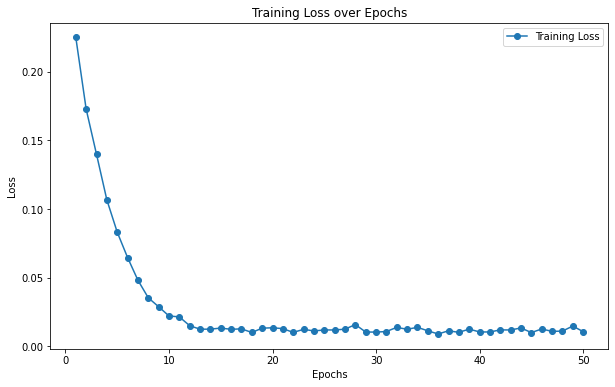

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

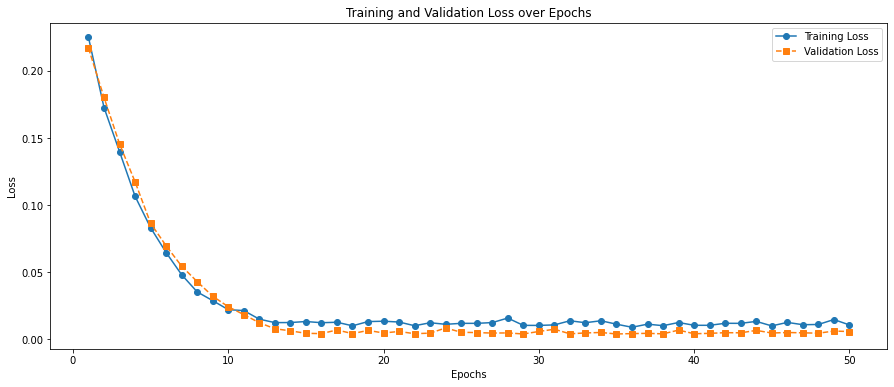

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Pacific_model_LT12/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.05674911887131703
MAE : 0.04604071887891813


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,8.421939e+05,819257.445
1,1.160132e+06,1129627.707
2,1.364910e+06,1463383.236
3,1.651331e+06,1614536.727
4,1.818843e+06,1862498.612
5,1.955455e+06,2099349.296
6,1.902649e+06,1981614.046
7,1.236877e+06,1433022.369
8,9.416658e+05,826739.716
9,4.940283e+05,477145.887


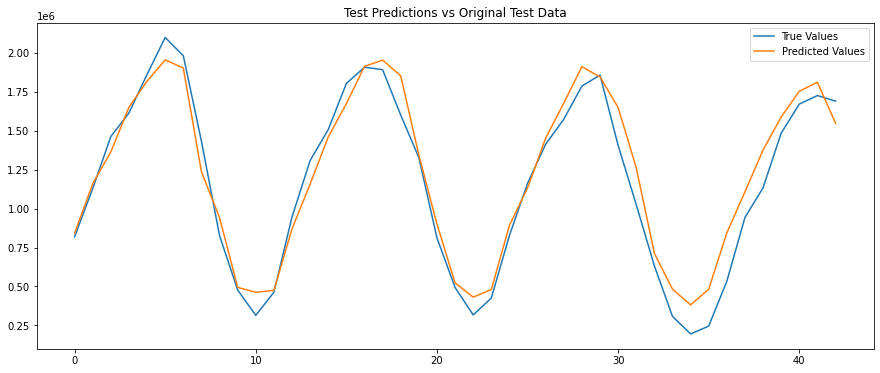

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 3ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

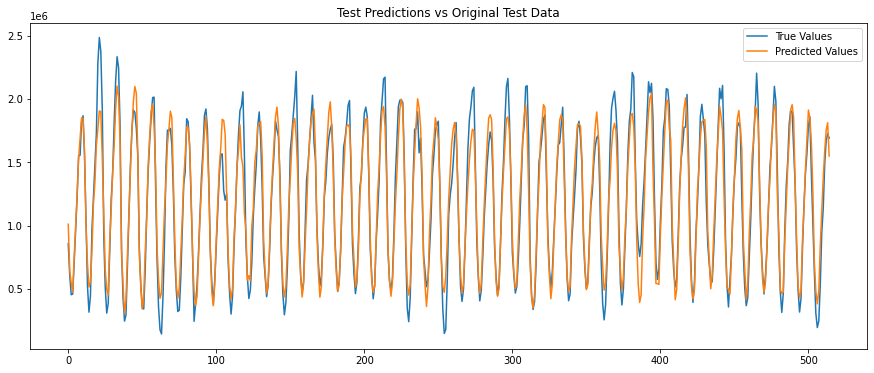

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()